In [47]:
import numpy as np
from math import sqrt
import random
import matplotlib.pyplot as plt

In [48]:
def qubic_spline_coeff(x_nodes, y_nodes):
    n = len(x_nodes)
    
    h = [] #список значений h
    for i in range(0, n - 1):
        t = np.around(x_nodes[i + 1] - x_nodes[i], decimals = 3)
        h.append(t)
    
    ta = [1] #главная диагональ матрицы A 
    tb = []  #диагональ ниже главной
    tc = [0] #диагональ выше главной
    for i in range(0, n - 2):
        t1 = 2 * (h[i + 1] + h[i])
        t2 = h[i]
        t3 = h[i + 1]
        ta.append(t1)
        tb.append(t2)
        tc.append(t3)
    ta.append(1)
    tb.append(0)
    
    tta = np.diag(ta, 0)    #матрица с заполненной главной диагональю, остальное - 0
    ttb = np.diag(tb, -1)   #матрица с заполненной диагональю на одну ниже главной
    ttc = np.diag(tc, 1)    #матрица с заполненной диагональю на одну выше главной
    A = tta + ttb + ttc     #складываем все три матрциы и получаем матрицу A
    revA = np.linalg.inv(A) #находим обратную матрицу A^(-1)
    
    F = np.zeros(shape = (n, 1)) #получим матрицу F
    for i in range(1, n - 1):
        t1 = y_nodes[i + 1] - y_nodes[i]
        t2 = y_nodes[i] - y_nodes[i - 1]
        F[i][0] = 3 * (t1 / h[i] - t2 / h[i - 1])
    
    c = np.dot(revA, F) #находим произведение матриц A^(-1)*F как матрицу коэффициентов c
    
    a = np.zeros(shape = (n - 1, 1))
    b = np.zeros(shape = (n - 1, 1))
    d = np.zeros(shape = (n - 1, 1))
    for i in range(0, n - 1):
        a[i][0] = y_nodes[i]
        b[i][0] = (1 / h[i]) * (y_nodes[i + 1] - y_nodes[i]) - h[i] / 3 * (c[i + 1] + 2 * c[i])
        d[i][0] = (c[i + 1][0] - c[i][0]) / (3 * h[i])
    
    c = np.delete(c, obj = 10, axis = 0) #удаляем последний элемент матрицы, так как тот лишний

    coeffs = np.c_[a, b, c, d]
    
    return coeffs

In [49]:
def qubic_spline(x_nodes, x, qs_coeff):
    n = len(x_nodes)
            
    for i in range(0, n - 1):
            if x >= x_nodes[i] and x <= x_nodes[i + 1]:
                j = i
    
    a = qs_coeff[j][0]
    b = qs_coeff[j][1]
    c = qs_coeff[j][2]
    d = qs_coeff[j][3]
    difX = x - x_nodes[j]
    s_x = a + b * difX + c * difX * difX + d * difX * difX * difX
    
    return s_x

In [50]:
def p1Calculation(nodesXY):
    n = len(nodesXY)
    
    vectorList = []
    for i in range(0, 1000):
        krXY = np.zeros(n)
        for j in range(0, n):
            Z = random.gauss(0, 0.01)
            krXY[j] = nodesXY[j] + Z
        vectorList.append(krXY)
        
    return vectorList

In [51]:
def plotParagraph54b(x_nodes, y_list):
    fig, ax = plt.subplots(figsize=(12, 6))
    x_for_plotting = np.linspace(0, 1, 200)
    
    ax.set_xlabel('x', fontsize = 'x-large')
    ax.set_ylabel('h(x)', fontsize = 'x-large')
  
    for i in range(0, 1000):
        qs_coeff = qubic_spline_coeff(x_nodes, y_list[i])
        ax.plot(x_for_plotting, [qubic_spline(x_nodes, x, qs_coeff) for x in x_for_plotting], '-', linewidth = 0.5)

    ax.grid(True)
    plt.savefig('plotParagraph54b.pdf')

In [52]:
def meanCalculation(x, x_nodes, y_list):
    sum = 0
    for i in range(0, 1000):
        qs_coeff = qubic_spline_coeff(x_nodes, y_list[i])
        sum = sum + qubic_spline(x_nodes, x, qs_coeff)
    sum = sum / 1000
    
    return sum    

In [53]:
def confIntCalculation(x, x_nodes, y_list):
    mean = meanCalculation(x, x_nodes, y_list)
    sigma = 0
    for i in range(0, 1000):
        qs_coeff = qubic_spline_coeff(x_nodes, y_list[i])
        h_i = qubic_spline(x_nodes, x, qs_coeff)
        sigma = sigma + (h_i - mean) * (h_i - mean)
    sigma = sqrt(sigma / 1000)
    delta = 1.645 * sigma
    
    return mean - delta, mean, mean + delta

In [54]:
def plotParagraph54c(y_list, x_nodes, y_nodes):
    fig, ax = plt.subplots(figsize=(12, 6))
    x_for_plotting = np.linspace(0, 1, 200)
    
    ax.set_xlabel('x', fontsize = 'x-large')
    ax.set_ylabel('h(x)', fontsize = 'x-large')

    h_l = []
    h_u = []
    for x in x_for_plotting:
        mean_l, mean, mean_u = confIntCalculation(x, x_nodes, y_list)
        h_l.append(mean_l)
        h_u.append(mean_u)
        
    ax.fill_between(x_for_plotting, h_u, h_l, color = 'lightgray')
    ax.plot(x_for_plotting, h_u,'-', color = 'r',  label = 'h_u(x)', linewidth = 1)
    ax.plot(x_for_plotting, h_l,'-', color = 'b', label = 'h_l(x)', linewidth = 1)
    
    ax.grid(True)
    ax.legend(loc='lower right')
    plt.savefig('plotParagraph54c.pdf')

In [55]:
def plotParagraph54d(y_list, x_nodes, y_nodes):
    fig, ax = plt.subplots(figsize=(12, 6))
    x_for_plotting = np.linspace(0, 1, 200)
    
    ax.set_xlabel('x', fontsize = 'x-large')
    ax.set_ylabel('h(x)', fontsize = 'x-large')

    h_l = []
    mean_lu = []
    h_u = []
    for x in x_for_plotting:
        mean_l, mean, mean_u = confIntCalculation(x, x_nodes, y_list)
        h_l.append(mean_l)
        mean_lu.append(mean)
        h_u.append(mean_u)
        
    ax.plot(x_for_plotting, h_u,'-', color = 'r',  label = 'h_u(x)', linewidth = 1)
    ax.plot(x_for_plotting, mean_lu, '-', color = 'g', label = 'усреднённый интерполянт', linewidth = 1)
    ax.plot(x_for_plotting, h_l,'-', color = 'b', label = 'h_l(x)', linewidth = 1)
    ax.plot(x_nodes, y_nodes,'ro', label = '(x_nodes; y_nodes)', markersize = 6)
              
    ax.grid(True)
    ax.legend(loc='lower right')
    plt.savefig('plotParagraph54d.pdf')

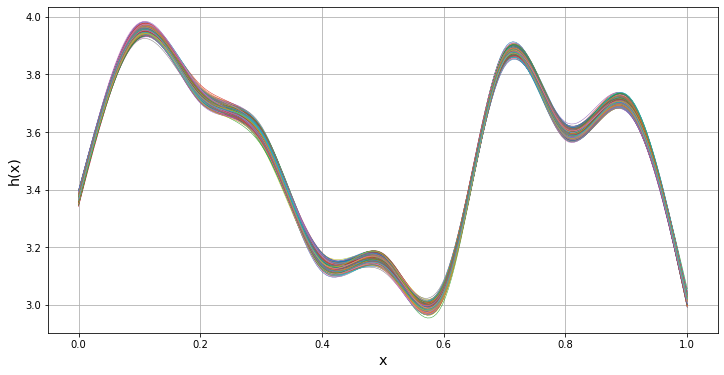

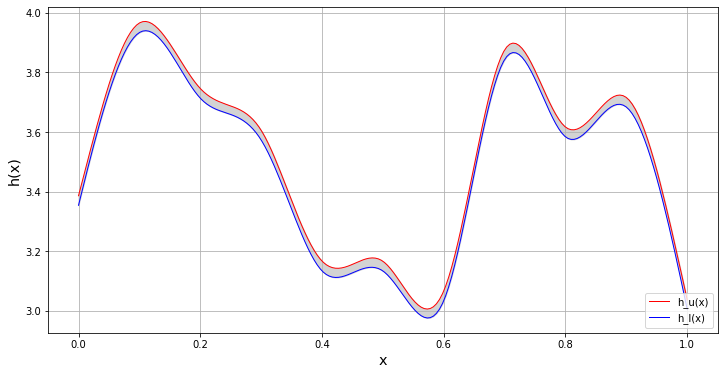

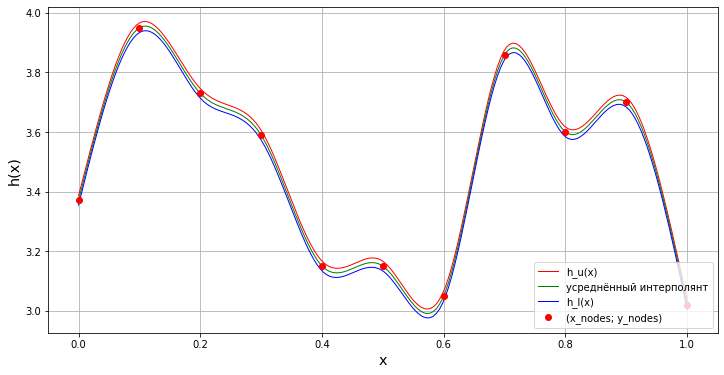

In [56]:
if __name__ == '__main__':
    x_nodes = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
    y_nodes = [3.37, 3.95, 3.73, 3.59, 3.15, 3.15, 3.05, 3.86, 3.60, 3.70, 3.02]

    vectorList = p1Calculation(y_nodes)
    plotParagraph54b(x_nodes, vectorList)
    plotParagraph54c(vectorList, x_nodes, y_nodes)
    plotParagraph54d(vectorList, x_nodes, y_nodes)
        